Environment setup

In [ ]:
import numpy as np
import pandas as pd
import os
from PIL import Image

from sklearn.cluster import KMeans
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

path = '/content/drive/MyDrive/PHYS3153 O6/Dataset shift/'

Mounted at /content/drive/


Get the image data from google drive

In [ ]:
name = ['Capture_0001.png','Capture_0002.png','Capture_0003.png','Capture_0004.png','Capture_0005.png','Capture_0006.png','Capture_0007.png','Capture_0008.png','Capture_0009.png','Capture_0010.png','Capture_0011.png','Capture_0012.png']
img= []
for i in range(12):
  img_path = os.path.join(path, name[i])
  temp = Image.open(img_path).convert('L')
  img.append(np.array(temp))



# Part 1:Use Kmeans clustering to find centroid point for each image

In [ ]:
centroids = []
for i in range(12):
  threshold_value = 200
  binary_map = (img[i] > threshold_value).astype(int)

  bright_spots = np.argwhere(binary_map == 1)


  kmeans = KMeans(n_clusters=1, random_state=0).fit(bright_spots)

  centroids.append(kmeans.cluster_centers_[0])
print(centroids)

[array([ 410.96723925, 1145.69051766]), array([ 414.16975565, 1141.35841092]), array([ 411.69516886, 1139.20850966]), array([ 409.2245531 , 1141.52469748]), array([ 408.48594668, 1141.13911201]), array([ 408.0726662 , 1140.36771488]), array([ 406.74131386, 1140.08014407]), array([ 406.02573611, 1140.50254404]), array([ 399.30572767, 1147.59471654]), array([ 396.90751762, 1149.42750325]), array([ 395.88705261, 1150.65518651]), array([ 393.72374355, 1152.72655657])]


# Part 2: Use the fitted plot of frequency versus voltage to convert the data

In [ ]:
voltage = np.array([11,13.8,15.6,18.1,19,21.1,23.1,25.9,26.2,28,28.9,31.7])
frequency = voltage*17.564 - 8.4014
print(frequency)

[184.8026 233.9818 265.597  309.507  325.3146 362.199  397.327  446.5062
 451.7754 483.3906 499.1982 548.3774]


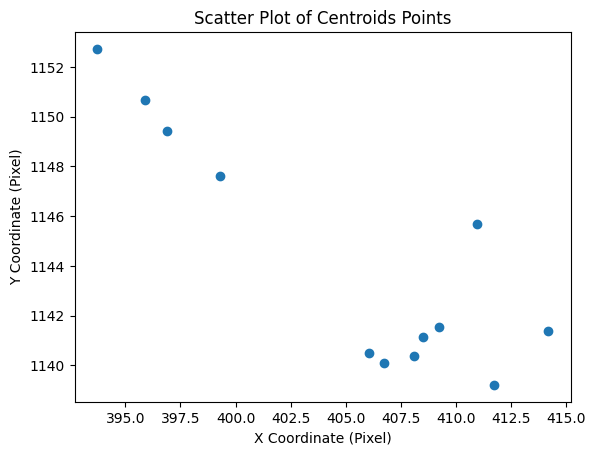

In [ ]:
import matplotlib.pyplot as plt
centroids = np.array(centroids)

x_points = centroids[:, 0]
y_points = centroids[:, 1]

# Create a scatter plot
plt.scatter(x_points, y_points)

# Set the title and labels
plt.title('Scatter Plot of Centroids Points')
plt.xlabel('X Coordinate (Pixel)')
plt.ylabel('Y Coordinate (Pixel)')

# Show the plot
plt.show()

# Part 3: PCA method for dimension reduction & subtraction with the first data

In [ ]:
origin = centroids[0]

# Translate the dataset so that the first data point is at the origin
translated_data = centroids - origin

# Since we want to fit the data into a 1D line, we can take the magnitude of each point
# from the origin to represent it on a 1D line.
result_1d_array = np.linalg.norm(translated_data, axis=1)

# The first data point is at the origin, so its magnitude is 0.
# We replace the first element with 0 to reflect this.
result_1d_array[0] = 0

# Print the resulting 1D array
print(result_1d_array)

[ 0.          5.38732402  6.52275319  4.51564091  5.18383123  6.05894237
  7.0238691   7.16474169 11.8159564  14.54788072 15.87639649 18.62374794]


Closest Points on Line:
Data Point 1: Closest Point on Line: (408.73, 1141.99)
Data Point 2: Closest Point on Line: (413.00, 1139.42)
Data Point 3: Closest Point on Line: (412.14, 1139.94)
Data Point 4: Closest Point on Line: (409.30, 1141.65)
Data Point 5: Closest Point on Line: (408.93, 1141.87)
Data Point 6: Closest Point on Line: (408.97, 1141.85)
Data Point 7: Closest Point on Line: (408.12, 1142.36)
Data Point 8: Closest Point on Line: (407.41, 1142.79)
Data Point 9: Closest Point on Line: (399.35, 1147.67)
Data Point 10: Closest Point on Line: (396.78, 1149.22)
Data Point 11: Closest Point on Line: (395.49, 1150.00)
Data Point 12: Closest Point on Line: (392.99, 1151.51)

Distances from Closest Points to First Data Point:
Distance from Data Point 1 to First Data Point: 4.32
Distance from Data Point 2 to First Data Point: 6.59
Distance from Data Point 3 to First Data Point: 5.87
Distance from Data Point 4 to First Data Point: 4.37
Distance from Data Point 5 to First Data Point: 4

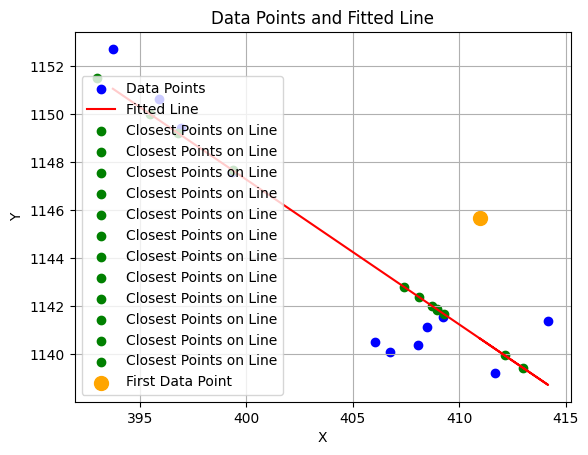

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample dataset (replace with your own data)
x = centroids[:,0]
y = centroids[:,1]

# Reshape x for sklearn
x_reshaped = x.reshape(-1, 1)

# Fit a linear regression model
model = LinearRegression()
model.fit(x_reshaped, y)

# Get the slope (m) and intercept (b) of the fitted line
m = model.coef_[0]
b = model.intercept_

# Function to find the closest point on the line for each data point
def closest_point_on_line(x0, y0, m, b):
    # Calculate x' using the formula derived above
    x_prime = (m * (y0 - b) + x0) / (m**2 + 1)
    # Calculate y' using the fitted line equation
    y_prime = m * x_prime + b
    return x_prime, y_prime

# Calculate closest points on the line and distances to the first data point
closest_points = []
distances_to_first_point = []

# First data point
first_x = x[0]
first_y = y[0]

for xi, yi in zip(x, y):
    x_closest, y_closest = closest_point_on_line(xi, yi, m, b)
    closest_points.append((x_closest, y_closest))

    # Calculate distance from closest point to the first data point
    distance = np.sqrt((x_closest - first_x)**2 + (y_closest - first_y)**2)
    distances_to_first_point.append(distance)

# Convert closest points to numpy array for easier handling
closest_points = np.array(closest_points)

# Print results
print("Closest Points on Line:")
for i, (x_closest, y_closest) in enumerate(closest_points):
    print(f"Data Point {i+1}: Closest Point on Line: ({x_closest:.2f}, {y_closest:.2f})")

print("\nDistances from Closest Points to First Data Point:")
for i, distance in enumerate(distances_to_first_point):
    print(f"Distance from Data Point {i+1} to First Data Point: {distance:.2f}")

# Optional: Plotting the results
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, model.predict(x_reshaped), color='red', label='Fitted Line')
for (x_closest, y_closest) in closest_points:
    plt.scatter(x_closest, y_closest, color='green', label='Closest Points on Line')
plt.scatter(first_x, first_y, color='orange', label='First Data Point', s=100)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data Points and Fitted Line')
plt.legend()
plt.grid()
plt.show()

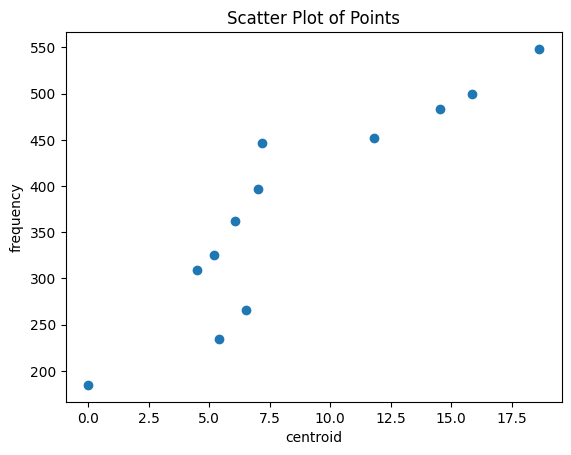

In [ ]:
# Create a scatter plot
plt.scatter(result_1d_array, frequency)

# Set the title and labels
plt.title('Scatter Plot of Points')
plt.xlabel('centroid')
plt.ylabel('frequency')

# Show the plot
plt.show()

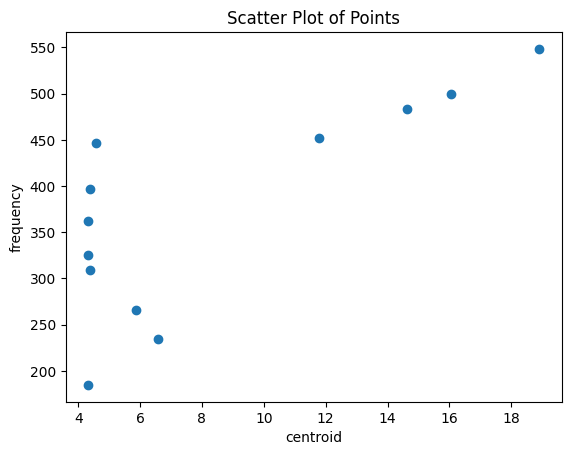

In [ ]:

# Create a scatter plot
plt.scatter(distances_to_first_point, frequency)

# Set the title and labels
plt.title('Scatter Plot of Points')
plt.xlabel('centroid')
plt.ylabel('frequency')

# Show the plot
plt.show()

In [ ]:
delta_s=[]
delta_f=[]
for i in range(11):
  delta_s.append(result_1d_array[i]-result_1d_array[0])
  delta_f.append(frequency[i]-frequency[0])
slope, y_int = np.polyfit(delta_f, delta_s, 1)
plt.scatter(delta_f, delta_s)
print(y_int,slope)
plt.title('Scatter Plot of ΔS versus Δf')
plt.xlabel('Δf (Hz)')
plt.ylabel('ΔS (Pixel)')
plt.axline((0, y_int), slope=slope,linewidth=4, color='r')
plt.text(0.5,0.5,'ΔS = 0.0386*Δf + 0.892')